[Reference](https://medium.com/geekculture/feature-selection-in-machine-learning-correlation-matrix-univariate-testing-rfecv-1186168fac12)

# one_hot_encoding

In [1]:
# import packages
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

# create a sample dataframe
X = pd.DataFrame({"input1": [1,2,3,4,5],
                  "input2": ["A","A","B","B","C"],
                  "input3": ["X","X","X","Y","Y"]})

# put categorical variables in a list 
categorical_vars = ["input2", "input3"]

# instantiate the one hot encoder
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")

# apply the one hot encoder logic 
encoder_vars_array = one_hot_encoder.fit_transform(X[categorical_vars])

# create object for the feature names using the categorical variables
encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

# create a dataframe to hold the one hot encoded variables
encoder_vars_df = pd.DataFrame(encoder_vars_array, columns = encoder_feature_names)

# concatenate the new dataframe back to the original input variables dataframe
X_new = pd.concat([X.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)

# drop the orignal input 2 and input 3 as it is not needed anymore
X_new.drop(categorical_vars, axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2 outliers detected in column input1
0 outliers detected in column input2
0 outliers detected in column input1
0 outliers detected in column input2


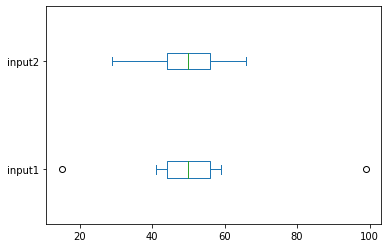

In [2]:
# import packages
import pandas as pd


# create a sample dataframe
my_df = pd.DataFrame({"input1": [15,41,44,47,50,53,56,59,99],
                      "input2": [29,41,44,47,50,53,56,59,66]})

my_df.plot(kind = "box", vert = False)

outlier_columns = ["input1", "input2"]


# Boxplot Approach

for column in outlier_columns:
    
    lower_quartile = my_df[column].quantile(0.25)
    upper_quartile = my_df[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 1.5
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = my_df[(my_df[column] < min_border) | (my_df[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    my_df.drop(outliers, inplace = True)
    


# Standar Deviation Approach

my_df = pd.DataFrame({"input1": [15,41,44,47,50,53,56,59,99],
                      "input2": [29,41,44,47,50,53,56,59,66]})

for column in outlier_columns:
    
    mean = my_df[column].mean()
    std_dev = my_df[column].std()
    
    min_border = mean - std_dev * 3
    max_border = mean + std_dev * 3
    
    outliers = my_df[(my_df[column] < min_border) | (my_df[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    my_df.drop(outliers, inplace = True)

# feature_scaling

In [3]:
# import packages
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# create a sample dataframe
my_df = pd.DataFrame({"Height": [1.98,1.77,1.76,1.80,1.64],
                      "Weight": [99,81,70,86,82]})


# Standardisation
scale_standard = StandardScaler()

scale_standard.fit_transform(my_df)
my_df_standardised = pd.DataFrame(scale_standard.fit_transform(my_df), columns = my_df.columns)
print(my_df_standardised)

# Normalisation
scale_norm = MinMaxScaler()
scale_norm.fit_transform(my_df)
my_df_normalised = pd.DataFrame(scale_norm.fit_transform(my_df), columns = my_df.columns)
print(my_df_normalised)

     Height    Weight
0  1.734455  1.646894
1 -0.182574 -0.278047
2 -0.273861 -1.454400
3  0.091287  0.256659
4 -1.369306 -0.171106
     Height    Weight
0  1.000000  1.000000
1  0.382353  0.379310
2  0.352941  0.000000
3  0.470588  0.551724
4  0.000000  0.413793


# feature_selection_correlation_matri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


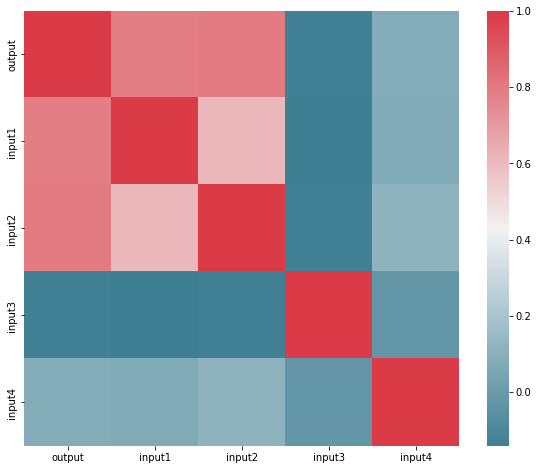

In [4]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data
my_df = pd.read_csv("https://raw.githubusercontent.com/ZL63388/data-preparation-codes/main/feature_selection_sample_data.csv")

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = my_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# feature_selection_rfecv

Optimal numer of features: 2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

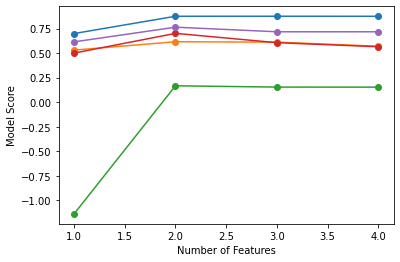

In [5]:
import pandas as pd

my_df = pd.read_csv("https://raw.githubusercontent.com/ZL63388/data-preparation-codes/main/feature_selection_sample_data.csv")

# Recursive Feature Elimination with Cross Validation

from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X,y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal numer of features: {optimal_feature_count}")

X_new = X.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.grid_scores_), 4)})")
plt.tight_layout() 
plt.show()

In [6]:
# import packages
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression


# import data
my_df = pd.read_csv("https://raw.githubusercontent.com/ZL63388/data-preparation-codes/main/feature_selection_sample_data.csv")


# Regression Template

X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

feature_selector = SelectKBest(f_regression, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]



 
# Classification Template

from sklearn.feature_selection import SelectKBest, chi2

X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

print(summary_stats)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]
X_new

  input_variable       p_value   chi2_score
0         input1  0.000000e+00  1845.670783
1         input2  0.000000e+00  2480.832410
2         input3  0.000000e+00  4699.499797
3         input4  9.005236e-76   514.117051


,input1,input2,input3,input4
0,534,536,466,599
1,264,103,244,519
2,272,339,609,474
3,416,444,330,582
4,520,464,104,412
5,81,415,705,444
6,380,386,408,532
7,549,596,387,443
8,431,364,672,420
9,574,611,182,422


# missing_values_with_knnimputer

In [7]:
# import packages
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# create a sample dataframe
my_df = pd.DataFrame({"A": [1,2,3,4,5],
                      "B": [1,1,3,3,4],
                      "C": [1,2,9,np.nan,20]})


# define the package into a variable
knn_imputer = KNNImputer()


# define the package into a variable with a specific parameter 
# the default n_neighbors is 5
knn_imputer = KNNImputer(n_neighbors = 1)
knn_imputer = KNNImputer(n_neighbors = 2)

# define the package into a variable with the weights parameter
# the default value of weights = uniform
knn_imputer = KNNImputer(n_neighbors = 2, weights = "distance")
knn_imputer.fit_transform(my_df)


# change the datatype to dataframe 
my_df1 = pd.DataFrame(knn_imputer.fit_transform(my_df), columns = my_df.columns)

# missing_values_with_pandas

In [8]:
# import packages
import pandas as pd
import numpy as np


# create a sample dataframe
my_df = pd.DataFrame({"A": [1,2,3,np.nan,5,np.nan,7],
                      "B": [4,np.nan,7,np.nan,1,np.nan,2]})


# finding missing values with pandas
my_df.isna()
my_df.isna().sum()


# dropping missing values with pandas
my_df.dropna()
my_df.dropna(how = "any")
my_df.dropna(how = "all")

# for specific columns
my_df.dropna(how = "any", subset = ["A"])

# put the "inplace" parameter to True to apply it permanently to the dataframe
my_df.dropna(how = "any", inplace = True)


# filling missing vaues with pandas
my_df = pd.DataFrame({"A": [1,2,3,np.nan,5,np.nan,7],
                      "B": [4,np.nan,7,np.nan,1,np.nan,2]})

my_df.fillna(value = 100)

mean_value = my_df["A"].mean()
my_df["A"].fillna(value = mean_value)

my_df.fillna(value = my_df.mean(), inplace = True)

# missing_values_with_simpleimputer

In [9]:
# import packages
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


# create a sample dataframe
my_df = pd.DataFrame({"A": [1,4,7,10,13],
                      "B": [3,6,9,np.nan,15],
                      "C": [2,5,np.nan,11,np.nan]})


# define the package into a variable
imputer = SimpleImputer()


# train the imputer with your dataframe using the .fit
imputer.fit(my_df)


# apply the imputer using the .transform to your dataframe
imputer.transform(my_df)


# print results (results will be in array form)
my_df1 = imputer.transform(my_df)


# run again
imputer.fit_transform(my_df)


# to change the datatype to dataframe 
my_df2 = pd.DataFrame(imputer.transform(my_df), columns = my_df.columns)


# impute only a specific column
imputer.fit_transform(my_df[["B"]])
my_df["B"] = imputer.fit_transform(my_df[["B"]])

# model_validation

In [10]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

my_df = pd.read_csv("https://raw.githubusercontent.com/ZL63388/data-preparation-codes/main/feature_selection_sample_data.csv")


# Test/Trial Split

X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

# Regression Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)


# Cross Validation

cv_scores = cross_val_score(regressor, X, y, cv = 4, scoring = "r2")
cv_scores.mean()


# Regression Problem

cv = KFold(n_splits = 4, shuffle = True, random_state = 42)
cv_scores = cross_val_score(regressor, X, y, cv = cv, scoring = "r2")
cv_scores.mean()





# Classification Model (just add stratify = y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)


# # Classification Problem

# cv = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 42)
# cv_scores = cross_val_score(clf, X, y, cv = cv, scoring = "accuracy")
# cv_scores.mean()

0.7078051873514348